# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
male_df =  data.loc[data['Gender']=='Male']
male_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


In [4]:
female_df =  data.loc[data['Gender']=='Female']
female_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

In [5]:
import seaborn as sns

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


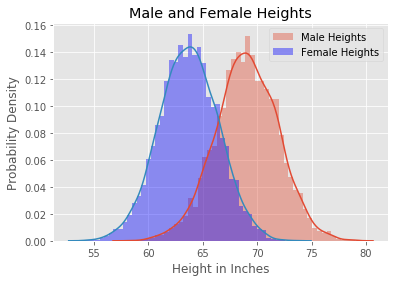

In [6]:
fig, ax = plt.subplots()

sns.distplot(male_df['Height'], hist=True, hist_kws={"alpha": 0.4, "label": "Male Heights"})
sns.distplot(female_df['Height'], hist=True, hist_kws={"color": 'blue', 'alpha': 0.4, 'label': 'Female Heights'})

ax.set_title('Male and Female Heights')
ax.set_xlabel('Height in Inches')
ax.set_ylabel('Probability Density')
plt.legend()

In [ ]:
# Record your observations - are these inline with your personal observations?

# both male and female heights individually are approximately normal
# male's are on average taller than women which I have observed personally


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

In [7]:
def density(x):
    """Take a random variable and calculate density function"""
    n, bins = np.histogram(x, 10, density=1)
    
    # initialization of the arrays
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    #interpolation
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
        
    # plot the calculated curve
    return pdfx, pdfy

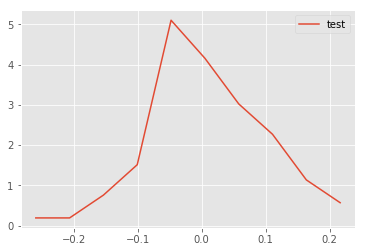

In [8]:
# Generate test data and test the function
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

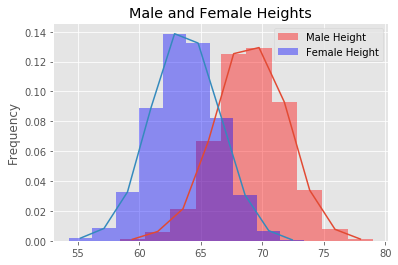

In [16]:
# You code here 
male_x, male_y = density(male_df['Height'])
female_x, female_y = density(female_df['Height'])


male_df['Height'].plot.hist(bins = 10, density = True, label = 'Male Height', color = 'red', alpha = 0.4)
female_df['Height'].plot.hist(bins = 10, density = True, label = 'Female Height', color = 'blue', alpha = 0.4)
plt.plot(male_x, male_y)
plt.plot(female_x,female_y)
plt.title('Male and Female Heights')
plt.ylabel('Frequency')
plt.legend()
plt.show()


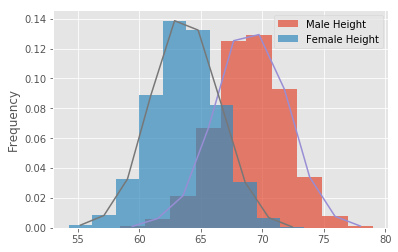

#### Repeat above exerice for male and female weights

In [ ]:
# Your code here 

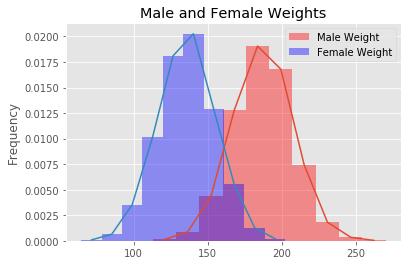

In [17]:
male_x, male_y = density(male_df['Weight'])
female_x, female_y = density(female_df['Weight'])


male_df['Weight'].plot.hist(bins = 10, density = True, label = 'Male Weight', color = 'red', alpha = 0.4)
female_df['Weight'].plot.hist(bins = 10, density = True, label = 'Female Weight', color = 'blue', alpha = 0.4)
plt.plot(male_x, male_y)
plt.plot(female_x,female_y)
plt.title('Male and Female Weights')
plt.ylabel('Frequency')
plt.legend()
plt.show()

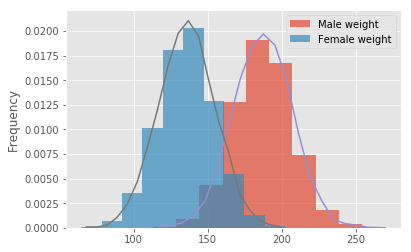

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?

# Males typically weigh more than females. This does fall in line with personal observations.


# So whats the takeaway when comparing male and female heights and weights 

# In both cases males are taller/weigh more than females. It follows the logic
# that height and weight are related. 


#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


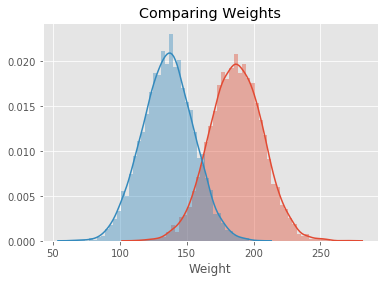

In [18]:
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])
plt.title('Comparing Weights')
plt.show()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


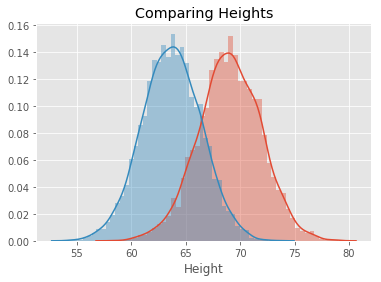

In [19]:
sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])
plt.title('Comparing Heights')
plt.show()

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

# The results are essentiall t

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.